In [7]:
import pandas as pd
import numpy as np
import scipy.io
genes = pd.read_csv('hg19/genes.tsv', sep='\t',header=None)
barcodes = pd.read_csv('hg19/barcodes.tsv', sep='\t',header=None)
labels = pd.read_csv('hg19/zheng17_bulk_lables.txt', sep='\n',header=None)
matrix = scipy.io.mmread('hg19/matrix.mtx')
matrix = pd.DataFrame.sparse.from_spmatrix(matrix)

In [8]:
genes #genes.values[:,0]
genes.loc[genes[1] == 'IL7R']

,0,1
8763,ENSG00000168685,IL7R


In [9]:
import pandas as pd
labels = pd.read_csv('hg19/zheng17_bulk_lables.txt', sep='\n',header=None)
#labels.values[0][0]
pd.unique(labels[0])

array(['CD8+ Cytotoxic T', 'CD8+/CD45RA+ Naive Cytotoxic',
       'CD4+/CD25 T Reg', 'CD19+ B', 'CD4+/CD45RO+ Memory', 'Dendritic',
       'CD56+ NK', 'CD34+', 'CD4+/CD45RA+/CD25- Naive T',
       'CD14+ Monocyte', 'CD4+ T Helper2'], dtype=object)

In [10]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,68569,68570,68571,68572,68573,68574,68575,68576,68577,68578
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#hlabels = ['Hematopoietic Stem Cells', 'Common Lymphoid Progenitor Cells','Common Myeloid Progenitor Cells', 
#          'TCells']
#hlabels = ['Hematopoietic Stem Cells', 'TCells']
hlabels = ['Lymphoid','Myeloid','T Cells','CD4 T','Conventional T','Effector/Memory T']
for label in pd.unique(labels[0]):
    hlabels.append(label)

labeldict = {}
cnt = 0
for label in hlabels:
    print(str(cnt) + " " + label);
    labeldict[label] = cnt; cnt+=1

0 Lymphoid
1 Myeloid
2 T Cells
3 CD4 T
4 Conventional T
5 Effector/Memory T
6 CD8+ Cytotoxic T
7 CD8+/CD45RA+ Naive Cytotoxic
8 CD4+/CD25 T Reg
9 CD19+ B
10 CD4+/CD45RO+ Memory
11 Dendritic
12 CD56+ NK
13 CD34+
14 CD4+/CD45RA+/CD25- Naive T
15 CD14+ Monocyte
16 CD4+ T Helper2


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
nuniq = len(hlabels)
ajmatrix = np.zeros(shape=(nuniq,nuniq))

ajmatrix[13] =[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # 13 to 0 and 1
ajmatrix[0] = [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0]# 0 to 2 and 9
ajmatrix[1] = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0] # 1 to 11 and 15
ajmatrix[2] = [0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0] # 2 to 3 and 6
ajmatrix[3] = [0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0] # 3 to 4 and 8
ajmatrix[4] = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0] # 4 to 14 5
ajmatrix[5] = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1] # to 16 and 10
ajmatrix[6] = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0] # to 7

#ajmatrix[0] = [0,0,0,0,0,0,0,0,0,1,0,0,0] # 0 to 9
#ajmatrix[1] = [0,0,1,1,1,0,1,0,0,0,1,0,1] # 1 to 2,3,4,6,10,12
#ajmatrix[9] = [0,1,0,0,0,1,0,1,1,0,0,1,0] # 9 to 1,5,7,8,11

graph = nx.from_numpy_matrix(ajmatrix)

0.0

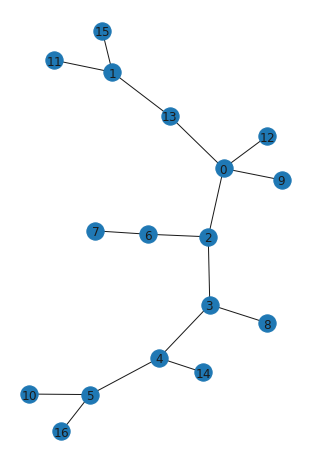

In [13]:
graph
plt.subplot(121)
glabels={}

glabels[0] = r'$0$'
glabels[1] = r'$1$'
glabels[2] = r'$2$'
glabels[3] = r'$3$'
glabels[4] = r'$4$'
glabels[5] = r'$5$'
glabels[6] = r'$6$'
glabels[7] = r'$7$'
glabels[8] = r'$8$'
glabels[9] = r'$9$'
glabels[10] = r'$10$'
glabels[11] = r'$11$'
glabels[12] = r'$12$'
glabels[13] = r'$13$'
glabels[14] = r'$14$'
glabels[15] = r'$15$'
glabels[16] = r'$16$'

#glabels[0]=r'$H$'
#glabels[1]=r'$T$'
#glabels[9]=r'$C$'
nx.draw(graph,labels=glabels)

#(nx.shortest_path_length(graph, 10, 12)-2)/3 
(nx.shortest_path_length(graph, 6, 7)-1)/8

In [42]:
# https://towardsdatascience.com/t-sne-python-example-1ded9953f26
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.manifold import _utils
from scipy.spatial.distance import is_valid_dm
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

MACHINE_EPSILON = np.finfo(np.double).eps # 1.0 + eps != 1.0
n_components = 2 # 2D
perplexity = 30  # Number of local neighbors.
N_ITER = 1000

#global ext_dist
X_embedded = None

def _joint_probabilities(distances, desired_perplexity, verbose):
    # Compute conditional probabilities such that they approximately match
    # the desired perplexity
    distances = distances.astype(np.float32, copy=False)
    conditional_P = _utils._binary_search_perplexity(distances, desired_perplexity, verbose)
    P = conditional_P + conditional_P.T
    sum_P = np.maximum(np.sum(P), MACHINE_EPSILON)
    P = np.maximum(squareform(P) / sum_P, MACHINE_EPSILON)
    return P

def _gradient_descent(obj_func, p0, args, it=0, n_iter=N_ITER, n_iter_check=1, n_iter_without_progress=300,
                      momentum=0.8, learning_rate=200.0, min_gain=0.01, min_grad_norm=1e-7):
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = i = it
    
    for i in range(it, n_iter):
        error, grad = obj_func(p, *args)
        grad_norm = linalg.norm(grad)
        inc = update * grad < 0.0
        dec = np.invert(inc)
        gains[inc] += 0.2
        gains[dec] *= 0.8
        np.clip(gains, min_gain, np.inf, out=gains)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update
        #print("[t-SNE] Iteration %d: error = %.7f, gradient norm = %.7f" % (i + 1, error, grad_norm))
        if error < best_error:
                best_error = error
                best_iter = i
        elif i - best_iter > n_iter_without_progress:
            print("Early stopping " + str(i))
            break

        if grad_norm <= min_grad_norm:
            print("Grad norm " + str(i))
            break
    return p

#def custom_pairwise(u,v):
#    return ((u-v)**2).sum() # sqeucledian
#    # distance to another node

def _kl_divergence(params, P, degrees_of_freedom, n_samples, n_components):
    X_embedded = params.reshape(n_samples, n_components)
    
    # Probability dist over the points in the low-dim mapping
    # Degree of freedom of students t-dist. 
    #dist = pdist(X_embedded, "sqeuclidean")
    
    # START NEW DIST FUNCTION: KEVIN
    dist = pdist(X_embedded, 'sqeuclidean')
    #ext_dist = dist
    # END
    
    dist /= degrees_of_freedom
    dist += 1.
    dist **= (degrees_of_freedom + 1.0) / -2.0
    Q = np.maximum(dist / (2.0 * np.sum(dist)), MACHINE_EPSILON)
    
    # Kullback-Leibler divergence of P and Q
    kl_divergence = 2.0 * np.dot(P, np.log(np.maximum(P, MACHINE_EPSILON) / Q))
    
    # Gradient: dC/dY
    grad = np.ndarray((n_samples, n_components), dtype=params.dtype)
    PQd = squareform((P - Q) * dist)
    for i in range(n_samples):
        grad[i] = np.dot(np.ravel(PQd[i], order='K'),
                         X_embedded[i] - X_embedded)
    grad = grad.ravel()
    c = 2.0 * (degrees_of_freedom + 1.0) / degrees_of_freedom
    grad *= c
    return kl_divergence, grad

def path_dist(label1, label2):
    i = labeldict.get(labels.values[label1][0])
    j = labeldict.get(labels.values[label2][0])
    #return (nx.shortest_path_length(graph, i, j)-1)
    return (nx.shortest_path_length(graph, i, j)-1)/8 # -2 is common to all graphs so siblings have a zero weight 

def path_pairwise(x, factor = 1, squared=True):
    dists = np.zeros((x.shape[0], x.shape[1]))
    for i, row_x in enumerate(x):     # loops over rows of `x`
        for j, row_y in enumerate(x): # loops over rows of `y`
            #dists[i, j] = path_dist(i,j)*factor#np.sum((row_x - row_y)**2)# * path_dist(i,j)
            dists[i, j] = (1-factor)+path_dist(i,j)*factor
    return dists

def fit(X, xlabels,factor, random =True):
    global X_embedded
    X = X.transpose() # KEVIN
    n_samples = X.shape[0]
    
    # Compute euclidean distance
    distances = pairwise_distances(X, metric='euclidean', squared=True)
    pathpairwise = path_pairwise(X, factor)#.15
    np.fill_diagonal(pathpairwise, 0)
    distances = np.multiply(distances,pathpairwise)
    
    #norm distances
    distances=(distances-distances.min())/(distances.max()-distances.min())
    #distances=(distances-distances.mean())/distances.std()
    
    # Compute joint probabilities p_ij from distances.
    P = _joint_probabilities(distances=distances, desired_perplexity=perplexity, verbose=False)
    
    # The embedding is initialized with iid samples from Gaussians with standard deviation 1e-4.
    # KEVIN: modify to include what we know as meaningful samples? (at nodes of tree).
    if random == True:
        X_embedded = 1e-4 * np.random.mtrand._rand.randn(n_samples, n_components).astype(np.float32)
    
    degrees_of_freedom = max(n_components - 1, 1)
    
    return _tsne(P, degrees_of_freedom, n_samples, X_embedded=X_embedded)

def _tsne(P, degrees_of_freedom, n_samples, X_embedded):
    params = X_embedded.ravel()
    obj_func = _kl_divergence
    params = _gradient_descent(obj_func, params, [P, degrees_of_freedom, n_samples, n_components])
    X_embedded = params.reshape(n_samples, n_components)
    return X_embedded

In [18]:
import statistics
#ncols = 6000
ncols = 500
submatrix = matrix.iloc[:,0:ncols]
sums = submatrix.sum(axis=1)
rows = []
for _i in range(len(sums)):
    if sums[_i] <= 0.0:
        rows.append(_i)
    else:
        var = statistics.variance(submatrix.iloc[_i,:])
        if(var < 0.5): #.1
            rows.append(_i)
            
submatrix = submatrix.drop(rows)
submatrix

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
166,1.0,0.0,4.0,1.0,1.0,3.0,2.0,3.0,3.0,0.0,...,1.0,0.0,3.0,1.0,0.0,6.0,2.0,1.0,5.0,0.0
201,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
210,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
492,10.0,8.0,17.0,14.0,14.0,16.0,8.0,24.0,16.0,13.0,...,8.0,13.0,16.0,8.0,12.0,18.0,23.0,11.0,24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,0.0,1.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,...,2.0,3.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,1.0
32702,4.0,7.0,2.0,2.0,1.0,2.0,9.0,6.0,6.0,2.0,...,5.0,17.0,1.0,5.0,9.0,7.0,4.0,6.0,4.0,3.0
32705,2.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,0.0,0.0,...,2.0,8.0,4.0,1.0,2.0,1.0,4.0,2.0,2.0,5.0
32706,1.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [19]:
#submatrix = submatrix.iloc[0:submatrix.shape[1],:] # for small ncols
submatrix = submatrix.iloc[:,0:submatrix.shape[0]] # for large ncols'
submatrix.shape

(406, 406)

In [20]:
ncols = submatrix.shape[1]

sums = submatrix.sum(axis=1)
med = statistics.median(sums) # median of row sums
#colsums = submatrix.sum(axis=0) # median of each cell (column)

submatrix = (submatrix.div(submatrix.sum(axis=0),axis=1)).multiply(med) # normalize cols by their sums & multiply by median of row sums
#submatrix = submatrix.div(submatrix.sum(axis=1),axis=0) # normalize rows by their sums
#print(submatrix.mean())
#print(submatrix.std())
submatrix=(submatrix-submatrix.mean())/submatrix.std() #https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame/48651066
submatrix

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
166,-0.301540,-0.465151,0.325965,-0.210805,-0.293444,0.092999,-0.057516,-0.231707,0.108313,-0.477350,...,0.021282,-0.330101,0.023965,-0.514593,-0.326705,0.046169,-0.262993,-0.431815,-0.110226,0.028544
201,-0.547869,-0.465151,-0.498595,-0.528973,-0.501365,-0.292282,-0.506580,-0.363093,-0.532099,-0.477350,...,-0.331387,-0.543510,-0.506743,-0.514593,-0.510931,-0.494538,-0.413168,-0.431815,-0.524592,-0.514683
210,-0.547869,-0.465151,-0.498595,-0.210805,-0.501365,-0.484923,-0.506580,-0.494480,-0.532099,-0.271175,...,-0.331387,-0.330101,-0.506743,-0.305877,-0.326705,-0.314302,-0.262993,-0.431815,-0.317409,-0.152532
412,-0.547869,-0.465151,-0.498595,-0.528973,-0.501365,-0.292282,-0.506580,-0.625867,-0.532099,0.553522,...,-0.331387,-0.330101,-0.329841,-0.305877,-0.326705,-0.134067,-0.563344,-0.431815,-0.317409,-0.514683
492,1.915417,1.121836,3.005786,3.925371,2.409520,2.597327,1.289678,2.527414,2.883432,2.202918,...,2.666299,2.871035,2.500602,1.155135,1.699776,1.668288,2.590348,2.933777,1.547240,2.563605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,-0.547869,-0.266778,-0.498595,-0.528973,-0.501365,-0.099642,0.391549,-0.363093,-0.532099,-0.477350,...,-0.507722,0.310126,-0.506743,0.111555,0.041746,-0.314302,-0.112817,0.486074,0.096958,-0.514683
32702,0.437446,0.923462,-0.086315,0.107362,-0.293444,-0.099642,1.514211,0.162454,0.748725,-0.065001,...,0.373951,0.096717,0.023965,0.111555,0.041746,0.406640,0.337711,0.180111,0.304141,0.028544
32705,-0.055212,-0.068405,-0.086315,-0.210805,-0.085524,0.092999,-0.282048,-0.231707,-0.532099,-0.477350,...,-0.507722,-0.116692,-0.329841,-0.097161,-0.326705,-0.314302,-0.262993,0.180111,-0.317409,-0.333608
32706,-0.301540,-0.266778,0.119825,-0.528973,-0.501365,-0.292282,-0.057516,-0.625867,-0.532099,-0.065001,...,-0.507722,-0.543510,-0.506743,-0.514593,-0.510931,-0.494538,-0.563344,-0.431815,-0.110226,-0.514683


In [55]:
import sys
margs = sys.argv

ncols=submatrix.shape[0]
X_embedded2 = fit(submatrix, labels[0:ncols],0,True)#float(margs[1]))

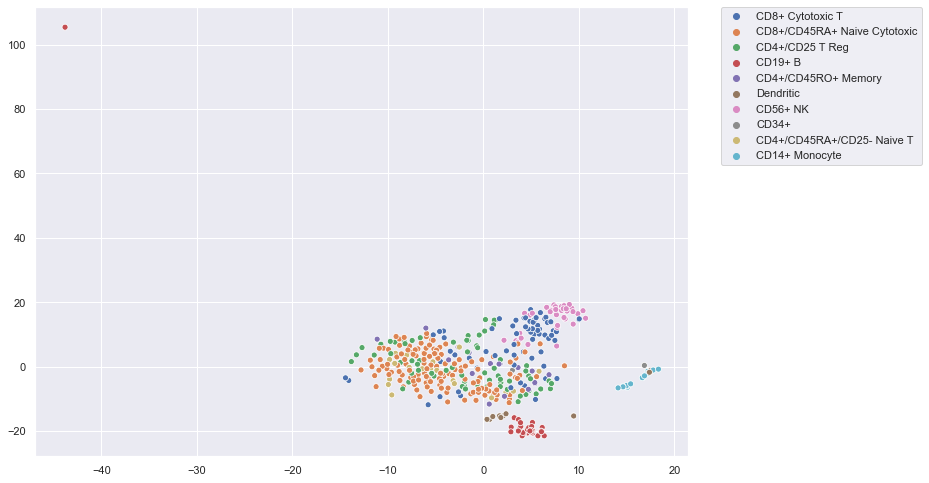

In [54]:
y = np.asarray(labels[0:ncols]).ravel()
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')

In [59]:
#GIF 
vlist = [0,0.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95, 1]
sns.set_style("white")
for val in vlist:
    X_embedded2 = fit(submatrix, labels[0:ncols],val,False)#float(margs[1]))
    plt = sns.scatterplot(X_embedded2[:,0], X_embedded2[:,1], hue=y, legend='full')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.get_figure().savefig(str(val) + '.png')
    matplotlib.pyplot.close('all')

In [ ]:
#SAVE:
plt = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.get_figure().savefig(str(margs[2]) + '.png')

Visualization

In [3]:
import seaborn as sns; import os; import numpy as np
import pickle
import matplotlib

for file in os.listdir('03'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    palette = sns.color_palette("bright", 10)
    #print(file)
    f = open( "03/"+file, "rb" )
    X_embedded = pickle.load(f); f.close()
    y = np.asarray(labels[0:X_embedded.shape[0]]).ravel()
    plt = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.get_figure().savefig(file + '.png')
    matplotlib.pyplot.close('all')

In [6]:
file= 'r60001.5.pickle'
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
#print(file)
f = open( "03/"+file, "rb" )
X_embedded = pickle.load(f); f.close()
y = np.asarray(new_labels[0:X_embedded.shape[0]]).ravel()
plt = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.get_figure().savefig(file + '.png')
#matplotlib.pyplot.close('all')

NameError: name 'new_labels' is not defined